In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

### 과제 1: Iris 다른 특성 조합  
Sepal Width와 Petal Width의 관계 분석 → 선형 회귀 모델 만들고 R² 비교하기  

In [156]:
# Iris 데이터 로드
iris = load_iris().data

# X: Sepal Width (꽃받침 너비)
X = iris[:, 1].reshape(-1, 1)

# y: Petal Width (꽃잎 너비)
y = iris[:, 3]

print(f"데이터 개수: {len(X)}개")
print(f"X 범위: {X.min():.1f} ~ {X.max():.1f} cm")
print(f"y 범위: {y.min():.1f} ~ {y.max():.1f} cm")

데이터 개수: 150개
X 범위: 2.0 ~ 4.4 cm
y 범위: 0.1 ~ 2.5 cm


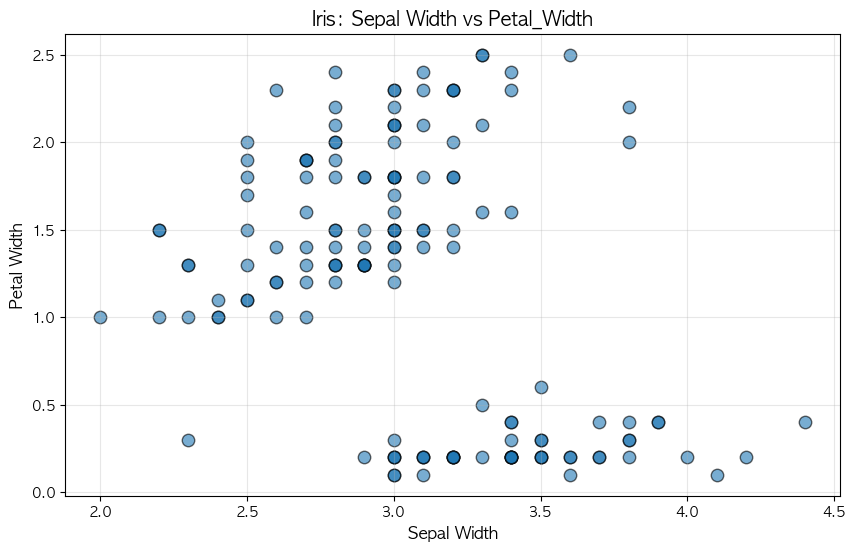

In [158]:
# scatter plot으로 데이터 확인
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=80, 
            edgecolors='black', linewidth=1)
plt.xlabel('Sepal Width', fontsize=12, fontweight='bold')
plt.ylabel('Petal Width', fontsize=12, fontweight='bold')
plt.title('Iris: Sepal Width vs Petal_Width', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [162]:
# Train: 80%, Test: 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train 세트: {len(X_train)}개")
print(f"Test 세트: {len(X_test)}개")

Train 세트: 120개
Test 세트: 30개


In [163]:
# 선형 회귀 모델 생성
model = LinearRegression()

# 학습!
model.fit(X_train, y_train)

# w와 b 확인
w = model.coef_[0]
b = model.intercept_

print(f" 학습 완료!")
print(f"가중치 w (기울기): {w:.3f}")
print(f"편향 b (절편): {b:.3f}")
print(f"찾은 식: y = {w:.3f}x + {b:.3f}")

 학습 완료!
가중치 w (기울기): -0.619
편향 b (절편): 3.078
찾은 식: y = -0.619x + 3.078


In [166]:
# Test 데이터로 예측
y_pred = model.predict(X_test)

# 처음 5개 비교
print("실제값 vs 예측값 (처음 5개)")
print("-" * 30)
for i in range(5):
    print(f"실제: {y_test[i]:.2f} cm | "
          f"예측: {y_pred[i]:.2f} cm | "
          f"차이: {abs(y_test[i] - y_pred[i]):.2f} cm")

실제값 vs 예측값 (처음 5개)
------------------------------
실제: 1.20 cm | 예측: 1.35 cm | 차이: 0.15 cm
실제: 0.30 cm | 예측: 0.73 cm | 차이: 0.43 cm
실제: 2.30 cm | 예측: 1.47 cm | 차이: 0.83 cm
실제: 1.50 cm | 예측: 1.28 cm | 차이: 0.22 cm
실제: 1.40 cm | 예측: 1.35 cm | 차이: 0.05 cm


In [167]:
# 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=" * 40)
print(" 모델 성능 평가")
print("=" * 40)
print(f"MSE (평균 제곱 오차): {mse:.3f}")
print(f"RMSE (평균 오차): {np.sqrt(mse):.3f} cm")
print(f"R² Score (결정계수): {r2:.3f}")
print("=" * 40)

 모델 성능 평가
MSE (평균 제곱 오차): 0.562
RMSE (평균 오차): 0.750 cm
R² Score (결정계수): 0.116


---

### 과제 2: 당뇨병 데이터 특성 선택
Glucose 예측에 가장 좋은 특성 조합 찾기
→ 2개, 3개, 5개 특성 조합 비교

In [204]:
df = pd.read_csv('train.csv')

In [205]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols] = df[cols].replace(0, pd.NA)
df = df.dropna()

In [219]:
def feature_combination(n):
    y = df['BMI']
    
    feature_candidates = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
    all_combinations = list(combinations(feature_candidates, n))
    
    best_r2_score = -np.inf
    best_features = None

    for features in all_combinations:
        
        X = df[list(features)]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2_score:
            best_r2_score = r2
            best_features = features

    return best_features, best_r2_score

In [220]:
best2_f, best2_r2 = feature_combination(2)
best3_f, best3_r2 = feature_combination(3)
best5_f, best5_r2 = feature_combination(5)

print(f'최적의 2개 특성 조합 : {best2_f}, R² 점수: {best2_r2:.6f}')
print(f'최적의 3개 특성 조합 : {best3_f}, R² 점수: {best3_r2:.6f}')
print(f'최적의 5개 특성 조합 : {best5_f}, R² 점수: {best5_r2:.6f}')

최적의 2개 특성 조합 : ('SkinThickness', 'Age'), R² 점수: 0.454594
최적의 3개 특성 조합 : ('Glucose', 'SkinThickness', 'Age'), R² 점수: 0.454595
최적의 5개 특성 조합 : ('Pregnancies', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'), R² 점수: 0.445834
